## method 1

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

In [12]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

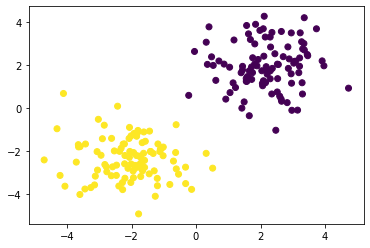

In [13]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

plt.scatter(x.detach().numpy()[:, 0],
            x.detach().numpy()[:, 1],
            c=y.detach().numpy())
plt.show()

In [14]:
net1 = Net(2, 10, 2)
net1

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)

In [15]:
optimzer = torch.optim.SGD(net1.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

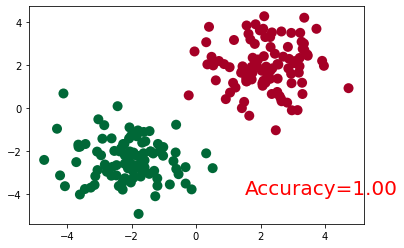

In [16]:
plt.ion()
for t in range(100):
    pred = net1(x)
    loss = loss_func(pred, y)

    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(pred, 1)[1]
        pred_y = prediction.detach().numpy()
        target_y = y.detach().numpy()
        plt.scatter(x.detach().numpy()[:, 0],
                    x.detach().numpy()[:, 1],
                    c=pred_y,
                    s=100,
                    lw=0,
                    cmap='RdYlGn')
        accuracy = float(
            (pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5,
                 -4,
                 'Accuracy=%.2f' % accuracy,
                 fontdict={
                     'size': 20,
                     'color': 'red'
                 })
        plt.pause(0.1)
        display.clear_output(wait=True)
plt.ioff()
plt.show()

In [8]:
net2 = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,2)
)
net2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)